In [2]:
#notebook based on zflemings:https://nbviewer.jupyter.org/github/zflamig/dask-era5/blob/main/notebook/era5_fargate_dask.ipynb
import xarray as xr
import fsspec
import dask
import s3fs
import numpy as np
xr.set_options(display_style="html")  #display dataset nicely 

In [3]:
import gcsfs
import fsspec
import xarray as xr

with xr.open_zarr(fsspec.get_mapper('gcs://pangeo-era5/reanalysis/spatial-analysis'),
                  consolidated=True,
                  chunks='auto') as ds:
    print(ds)

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 350640)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    asn        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    d2m        (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    e          (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    mn2t       (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    mx2t       (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    ptype      (time, latitude, longitude) float32 dask.array<chunksize=(31, 721, 1440), meta=np.ndarray>
    ro         (time, la

In [4]:

from intake import open_catalog
cat = open_catalog("https://raw.githubusercontent.com/pangeo-data/pangeo-datastore/master/intake-catalogs/atmosphere.yaml")
ds  = cat["era5_hourly_reanalysis_single_levels_sa"].to_dask()
ds_wnd = ds.u10

In [5]:
ds_wnd

<xarray.DataArray 'u10' (time: 350640, latitude: 721, longitude: 1440)>
dask.array<xarray-u10, shape=(350640, 721, 1440), dtype=float32, chunksize=(31, 721, 1440), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Attributes:
    long_name:  10 metre U wind component
    units:      m s**-1

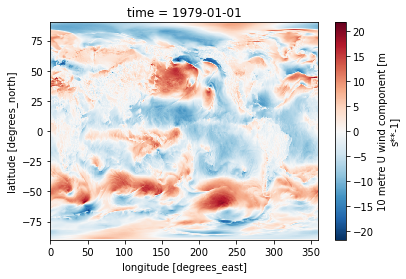

In [10]:
ds_wnd[0,:,:].plot()



In [ ]:
ts = ds_wnd.sel(longitude=slice(236,239),latitude=slice(46,41)).mean({'latitude','longitude'}).load()

In [ ]:
ts

In [ ]:
ts.to_netcdf('../../data/era5ts.nc')


In [ ]:
sub=ts.sel(time=slice('2017','2020'))

In [ ]:
# see if zac's data more recent?
import gcsfs
import fsspec
url = 's3://era5-pds/1980/01/data/sea_surface_temperature.nc'
ncfile = fsspec.open(url)
ds = xr.open_dataset(ncfile.open())
ds = ds.mean({'time0'})